In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [268]:
df=pd.read_csv('train.csv')

In [269]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
a=list(range(1,20,4))

In [271]:
a

[1, 5, 9, 13, 17]

In [272]:
b=[100,9,75,268,-100]

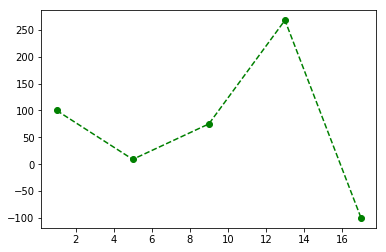

In [273]:
plt.plot(a,b,'go--')

In [274]:
from sklearn.linear_model import LogisticRegression

In [275]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [276]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [277]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [279]:
df.Fare=df.Fare.astype(int)

In [280]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7,NaN,S
1,1,1,female,38.0,1,0,71,C85,C
2,1,3,female,26.0,0,0,7,NaN,S
3,1,1,female,35.0,1,0,53,C123,S
4,0,3,male,35.0,0,0,8,NaN,S


In [281]:
pd.get_dummies(df.Sex,prefix='Sex').head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [282]:
pd.get_dummies(df.Embarked).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [283]:
df_new=pd.concat([df,pd.get_dummies(df.Sex,prefix='Sex'),pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

In [284]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7,NaN,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71,C85,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7,NaN,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53,C123,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8,NaN,S,0,1,0,0,1


In [285]:
df_new.drop(['Sex','Embarked','Sex_female','Embarked_Q'],axis=1,inplace=True)

In [286]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7,NaN,1,0,1
1,1,1,38.0,1,0,71,C85,0,1,0
2,1,3,26.0,0,0,7,NaN,0,0,1
3,1,1,35.0,1,0,53,C123,0,0,1
4,0,3,35.0,0,0,8,NaN,1,0,1


In [287]:
df_new.Cabin.fillna(value=0,inplace=True)

In [288]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7,0,1,0,1
1,1,1,38.0,1,0,71,C85,0,1,0
2,1,3,26.0,0,0,7,0,0,0,1
3,1,1,35.0,1,0,53,C123,0,0,1
4,0,3,35.0,0,0,8,0,1,0,1


In [289]:
df_new.Cabin.dtype

dtype('O')

In [290]:
df_new.Cabin=df_new.Cabin.str.replace('[A-Z].*','1')

In [291]:
df_new.Cabin.fillna(value=0,inplace=True)
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,0,3,22.0,1,0,7,0,1,0,1
1,1,1,38.0,1,0,71,1,0,1,0
2,1,3,26.0,0,0,7,0,0,0,1
3,1,1,35.0,1,0,53,1,0,0,1
4,0,3,35.0,0,0,8,0,1,0,1


In [292]:

df_new.Cabin=df_new.Cabin.astype(int)

In [293]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int32
Cabin         891 non-null int32
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int32(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [294]:
X=df_new.drop(['Survived'],axis=1)

In [295]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,22.0,1,0,7,0,1,0,1
1,1,38.0,1,0,71,1,0,1,0
2,3,26.0,0,0,7,0,0,0,1
3,1,35.0,1,0,53,1,0,0,1
4,3,35.0,0,0,8,0,1,0,1


In [296]:
y=df_new.Survived

In [297]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [300]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [301]:
y_train.sum()

268

In [302]:
y_test.sum()

74

In [303]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
Pclass        712 non-null int64
Age           572 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null int32
Cabin         712 non-null int32
Sex_male      712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(1), int32(2), int64(3), uint8(3)
memory usage: 35.5 KB


In [304]:
temp=X_train.Age.mean()
temp

29.498846153846156

In [305]:
X_train.Age.fillna(value=29,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [306]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
331,1,45.5,0,0,28,1,1,0,1
733,2,23.0,0,0,13,0,1,0,1
382,3,32.0,0,0,7,0,1,0,1
704,3,26.0,1,0,7,0,1,0,1
813,3,6.0,4,2,31,0,0,0,1


In [307]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null int32
Cabin         712 non-null int32
Sex_male      712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(1), int32(2), int64(3), uint8(3)
memory usage: 35.5 KB


In [308]:
temp=X_test.Age.mean()
temp

30.505845070422534

In [309]:
X_test.Age.fillna(value=31,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [310]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 709 to 10
Data columns (total 9 columns):
Pclass        179 non-null int64
Age           179 non-null float64
SibSp         179 non-null int64
Parch         179 non-null int64
Fare          179 non-null int32
Cabin         179 non-null int32
Sex_male      179 non-null uint8
Embarked_C    179 non-null uint8
Embarked_S    179 non-null uint8
dtypes: float64(1), int32(2), int64(3), uint8(3)
memory usage: 8.9 KB


In [311]:
X_train.Age=X_train.Age.astype(int)
X_test.Age=X_test.Age.astype(int)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [312]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
331,1,45,0,0,28,1,1,0,1
733,2,23,0,0,13,0,1,0,1
382,3,32,0,0,7,0,1,0,1
704,3,26,1,0,7,0,1,0,1
813,3,6,4,2,31,0,0,0,1


In [313]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
709,3,31,1,1,15,0,1,1,0
439,2,31,0,0,10,0,1,0,1
840,3,20,0,0,7,0,1,0,1
720,2,6,0,1,33,0,0,0,1
39,3,14,1,0,11,0,0,1,0


In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
rn=RandomForestClassifier()

In [316]:
rn.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [317]:
pred=rn.predict(X_test)

In [318]:
from sklearn.metrics import accuracy_score

In [319]:
score=accuracy_score(y_test,pred)

In [320]:
score

0.8268156424581006

In [321]:
from sklearn.model_selection import cross_val_score

In [322]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int32
Cabin         891 non-null int32
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int32(2), int64(3), uint8(3)
memory usage: 37.5 KB


In [323]:
X.Age.mean()

29.69911764705882

In [324]:
X.Age=X.Age.fillna(value=30)

In [325]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,22.0,1,0,7,0,1,0,1
1,1,38.0,1,0,71,1,0,1,0
2,3,26.0,0,0,7,0,0,0,1
3,1,35.0,1,0,53,1,0,0,1
4,3,35.0,0,0,8,0,1,0,1


In [328]:
X.Age=X.Age.astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int32
Cabin         891 non-null int32
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: int32(3), int64(3), uint8(3)
memory usage: 34.0 KB


In [330]:
y.shape

(891,)

In [346]:
rn=RandomForestClassifier(n_estimators=20)

In [347]:
scores=cross_val_score(rn,X,y,cv=5)
scores

array([0.77653631, 0.80446927, 0.83707865, 0.78651685, 0.83615819])

In [348]:
scores.mean()

0.8081518568601105

In [349]:
n_estimator_list=list(range(5,50,5))
a=[]
for i in n_estimator_list:
    rn=RandomForestClassifier(n_estimators=i)
    scores=cross_val_score(rn,X,y,cv=10)
    a.append(scores.mean())
print(a)    

[0.8048652252865736, 0.8115809783225514, 0.8071115650890931, 0.7992716490750199, 0.8216187152423107, 0.8026424355918739, 0.814939847917376, 0.8138415049370107, 0.815015038020656]


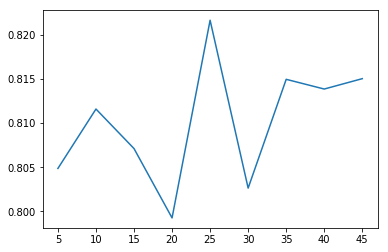

In [350]:
plt.plot(n_estimator_list,a)

In [359]:
depth_list=list(range(2,10,1))
b=[]
for i in depth_list:
    rn=RandomForestClassifier(n_estimators=10,max_depth=i)
    scores=cross_val_score(rn,X,y,cv=10)
    b.append(scores.mean())
print(b)   

[0.7757621155373964, 0.8170863125638407, 0.817111848825332, 0.8048280558392917, 0.8138415049370107, 0.8160259902394735, 0.8183100669617523, 0.8238406537282941]


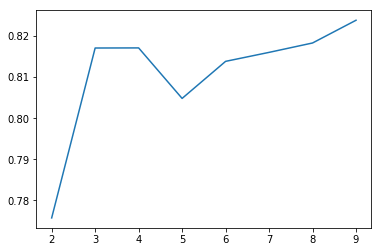

In [360]:
plt.plot(depth_list,b)

In [361]:
rn=RandomForestClassifier(n_estimators=10,max_depth=6)

In [362]:
rn.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [363]:
test_df=pd.read_csv('test.csv')

In [364]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [365]:
test_df.shape

(418, 11)

In [366]:
temp=test_df

In [367]:
test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [370]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [372]:
with pd.option_context('mode.use_inf_as_null', True):
   test_df.Fare.fillna(value=test_df.Fare.mean(),inplace=True)

In [373]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [375]:
with pd.option_context('mode.use_inf_as_null', True):
   test_df.Age.fillna(value=test_df.Age.mean(),inplace=True)

In [376]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [377]:
test_df.Fare=test_df.Fare.astype(int)

In [378]:
test_df.Age=test_df.Age.astype(int)

In [379]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34,0,0,7,NaN,Q
1,3,female,47,1,0,7,NaN,S
2,2,male,62,0,0,9,NaN,Q
3,3,male,27,0,0,8,NaN,S
4,3,female,22,1,1,12,NaN,S


In [380]:
test_df=pd.concat([test_df,pd.get_dummies(test_df.Sex,prefix='Sex'),pd.get_dummies(test_df.Embarked,prefix='Embarked')],axis=1)

In [381]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34,0,0,7,NaN,Q,0,1,0,1,0
1,3,female,47,1,0,7,NaN,S,1,0,0,0,1
2,2,male,62,0,0,9,NaN,Q,0,1,0,1,0
3,3,male,27,0,0,8,NaN,S,0,1,0,0,1
4,3,female,22,1,1,12,NaN,S,1,0,0,0,1


In [382]:
test_df.drop(['Sex','Sex_female','Embarked','Embarked_Q'],axis=1,inplace=True)

In [383]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,34,0,0,7,NaN,1,0,0
1,3,47,1,0,7,NaN,0,0,1
2,2,62,0,0,9,NaN,1,0,0
3,3,27,0,0,8,NaN,1,0,1
4,3,22,1,1,12,NaN,0,0,1


In [387]:
test_df.Cabin=test_df.Cabin.str.replace('[A-Z].*','1')

In [388]:
test_df.Cabin.value_counts(dropna=False)

NaN    327
1       91
Name: Cabin, dtype: int64

In [389]:
test_df.fillna(value=0,inplace=True)

In [390]:
test_df.Cabin.value_counts(dropna=False)

0    327
1     91
Name: Cabin, dtype: int64

In [391]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_S
0,3,34,0,0,7,0,1,0,0
1,3,47,1,0,7,0,0,0,1
2,2,62,0,0,9,0,1,0,0
3,3,27,0,0,8,0,1,0,1
4,3,22,1,1,12,0,0,0,1


In [392]:
pred_class=rn.predict(test_df)

In [394]:
temp=pd.read_csv('test.csv')

In [395]:
predictions=pd.DataFrame({'PassengerId':temp.PassengerId,'Survived':pred_class}).to_csv('predictions_rn_11.csv',index=False)